# Import Relevant Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import time

# Create DataFrame

In [2]:
# Data from Kaggle: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
# Dataset is also available in Scikit Learn
df = pd.read_csv('BCW_Data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## Clean Up Dataset

First we start off by checking for any Null values in any the loaded in Dataframe

In [3]:
df.isnull()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


From the above, we can see 'True' being returned for every value in 'Unamed: 32'. As it is of no use to us moving forward, we can drop it from our table.

In [4]:
df.drop('Unnamed: 32', inplace = True, axis = 1)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Heatmap

We draw a heatmap to show the correlation between columns. As we only include numerical values in heatmaps, we exclude the 'diagnosis' column as it is essentially a Boolean, only possible values being M for Malignant and B for Benign.

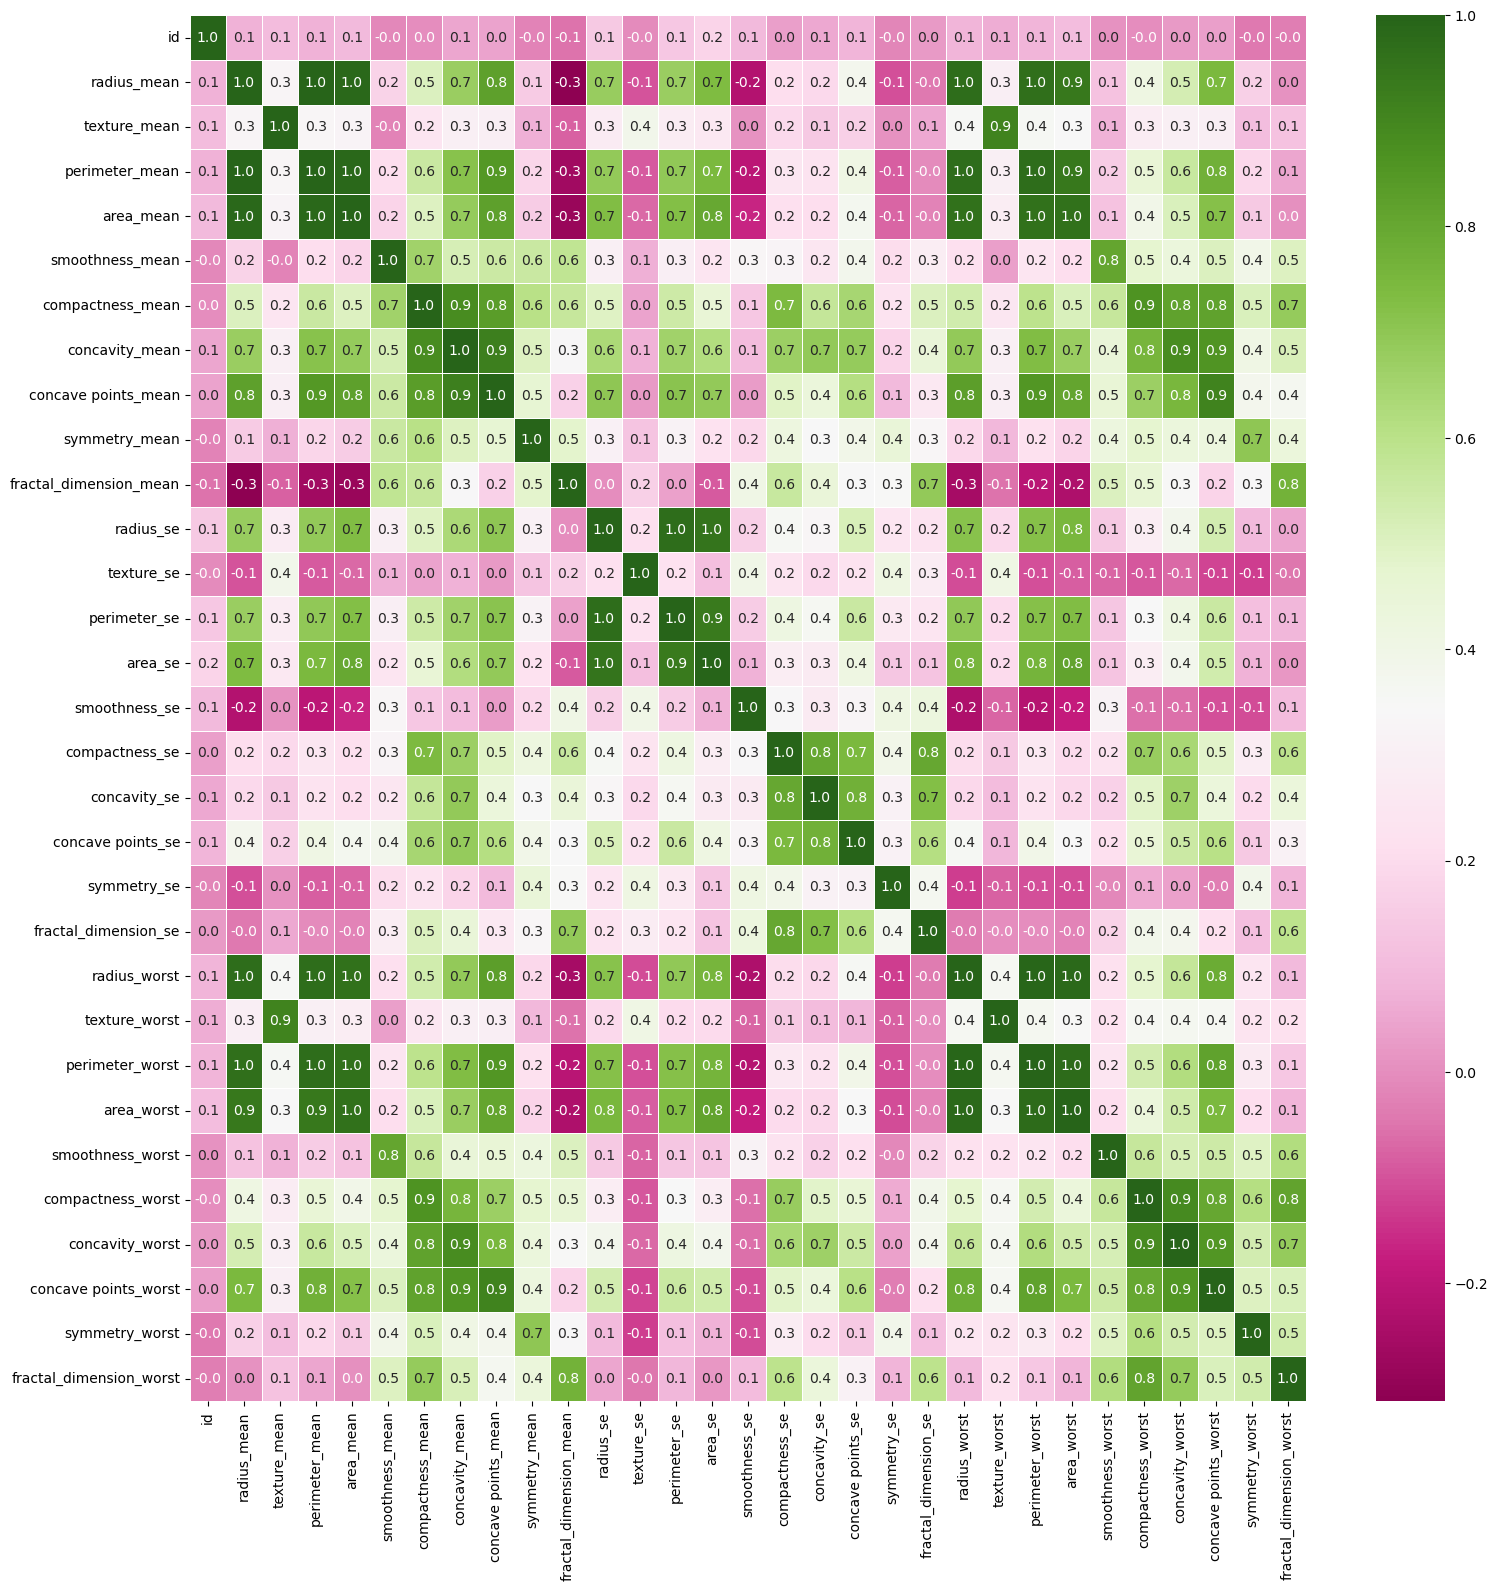

In [5]:
heatmap_df = df.select_dtypes(include = np.number)
corr = heatmap_df.corr()
f,ax = plt.subplots(figsize = (18, 18))
ax2 = sns.heatmap(corr, annot = True, linewidths = .5, fmt = '.1f', ax = ax, cmap = "PiYG")
plt.show()

# New Dataframe

Further clean the data, remove any columns we will not be using moving forward and and keep the rest.

Why the columns were removed:

- 'id': The primary key of the dataset and will not be taken into account when finding accuracy; if present, it will only skew the overall accuracy
- Every other removed column are due to their correlation value and necessity moving forward

In [6]:
# Do not remove concavity_mean, area_se, concavity_se, concavity_worst, concave points_worst
df.drop(df.columns[[0, 4, 5, 9, 19, 22, 24, 25]], axis = 1, inplace = True)
df

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concavity_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,0.11840,0.27760,0.30010,0.2419,0.07871,1.0950,0.9053,...,0.05373,0.03003,0.006193,17.33,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,0.08474,0.07864,0.08690,0.1812,0.05667,0.5435,0.7339,...,0.01860,0.01389,0.003532,23.41,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,0.10960,0.15990,0.19740,0.2069,0.05999,0.7456,0.7869,...,0.03832,0.02250,0.004571,25.53,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,0.14250,0.28390,0.24140,0.2597,0.09744,0.4956,1.1560,...,0.05661,0.05963,0.009208,26.50,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,0.10030,0.13280,0.19800,0.1809,0.05883,0.7572,0.7813,...,0.05688,0.01756,0.005115,16.67,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,0.11100,0.11590,0.24390,0.1726,0.05623,1.1760,1.2560,...,0.05198,0.01114,0.004239,26.40,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,0.09780,0.10340,0.14400,0.1752,0.05533,0.7655,2.4630,...,0.03950,0.01898,0.002498,38.25,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,0.08455,0.10230,0.09251,0.1590,0.05648,0.4564,1.0750,...,0.04730,0.01318,0.003892,34.12,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,0.11780,0.27700,0.35140,0.2397,0.07016,0.7260,1.5950,...,0.07117,0.02324,0.006185,39.42,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Skewness Before

Acquire the skewness every remaining column. 

A distribution that is mildly skewed is indicated by values between -1 and 1.
- A left skew, with the tail extending more to the left, is indicated by negative values.
- A right skew is shown by positive numbers, with the tail extending more to the right.

A highly skewed distribution is indicated by values outside of the -1 to 1 range.
- Significantly smaller values than -1 indicate a substantial left skew.
- Significantly higher values than 1 indicate a substantial right skew.


Skewness Range should be between -1 and 1. 
- If a distribution has a skewness value of 0; it means that it is entirely symmetrical (like a normal distribution)

What makes the Rule of Thumb -1 to 1?

- This range provides a useful framework for interpreting skewness in a variety of statistical tests. Most widely used statistical tests can withstand modest skewness, which is defined as being between -1 and 1.
- Skewness outside of this range may have an impact on the validity of some statistical tests, especially those that use the assumption of normalcy.

The precise effect is contingent upon the particular test, sample size, and degree of skewness.


In [7]:
df.skew(axis = 0, skipna = True, numeric_only = True)

radius_mean                0.942380
texture_mean               0.650450
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
symmetry_se                2.195133
fractal_dimension_se       3.923969
texture_worst              0.498321
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0.492616
symmetry_worst             1.433928
fractal_dimension_worst    1.662579
dtype: float64

# Histograms

Below I have included visualizations of the coloumns in the form of a histogram. This will aid in showcasing the skewness of a columns, either more to the left or right.

array([[<Axes: title={'center': 'radius_mean'}>]], dtype=object)

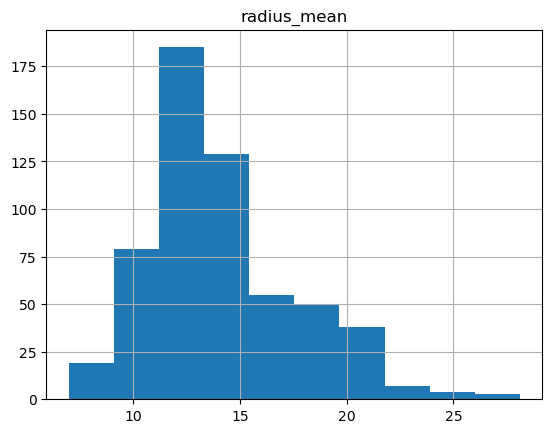

In [8]:
df.hist(column = 'radius_mean')

array([[<Axes: title={'center': 'texture_mean'}>]], dtype=object)

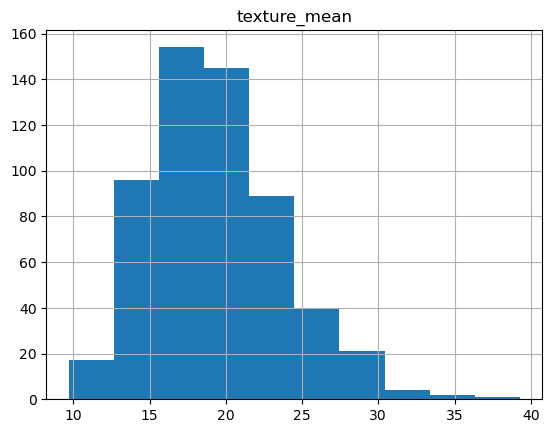

In [9]:
df.hist(column = 'texture_mean')

array([[<Axes: title={'center': 'smoothness_mean'}>]], dtype=object)

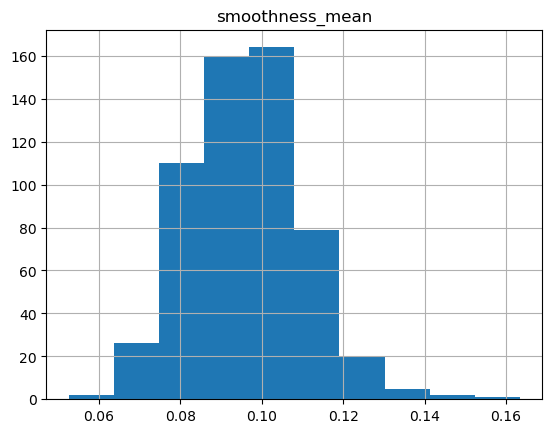

In [10]:
df.hist(column = 'smoothness_mean')

array([[<Axes: title={'center': 'compactness_mean'}>]], dtype=object)

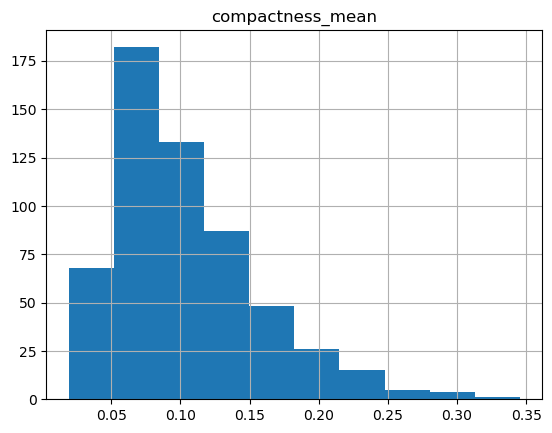

In [11]:
df.hist(column = 'compactness_mean')

array([[<Axes: title={'center': 'concavity_mean'}>]], dtype=object)

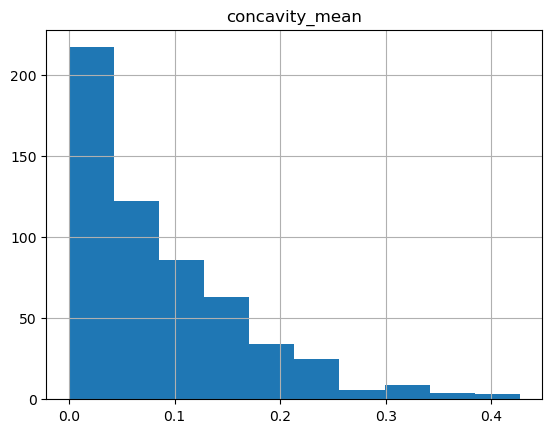

In [12]:
df.hist(column = 'concavity_mean')

array([[<Axes: title={'center': 'symmetry_mean'}>]], dtype=object)

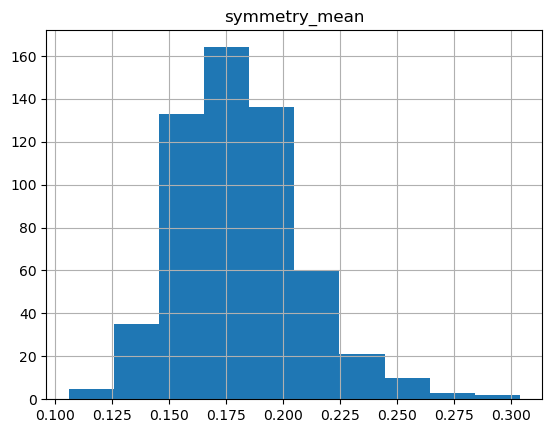

In [13]:
df.hist(column = 'symmetry_mean')

array([[<Axes: title={'center': 'fractal_dimension_mean'}>]], dtype=object)

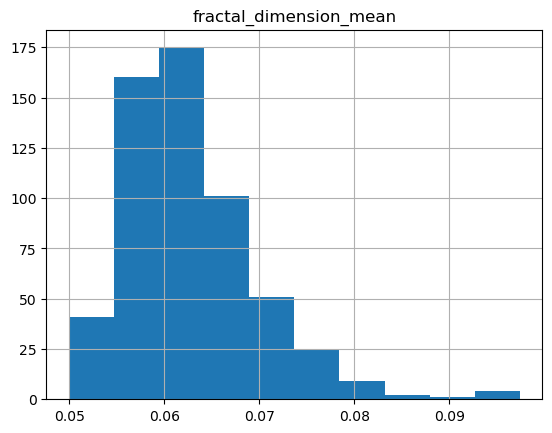

In [14]:
df.hist(column = 'fractal_dimension_mean')

array([[<Axes: title={'center': 'radius_se'}>]], dtype=object)

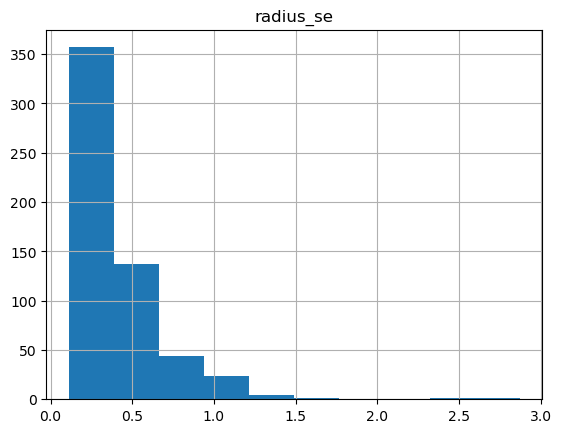

In [15]:
df.hist(column = 'radius_se')

array([[<Axes: title={'center': 'texture_se'}>]], dtype=object)

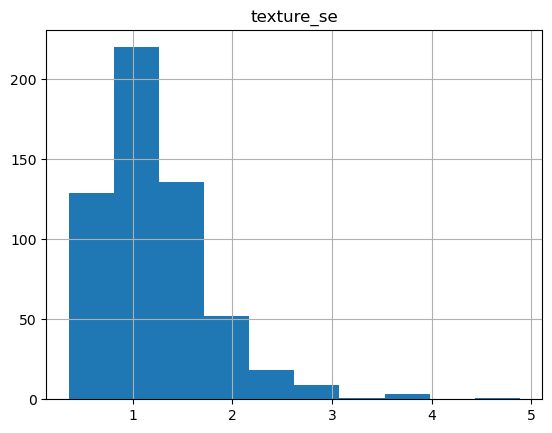

In [16]:
df.hist(column = 'texture_se') 

array([[<Axes: title={'center': 'perimeter_se'}>]], dtype=object)

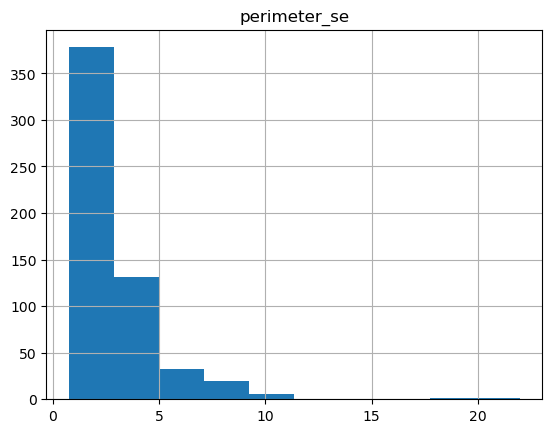

In [17]:
df.hist(column = 'perimeter_se') 

array([[<Axes: title={'center': 'area_se'}>]], dtype=object)

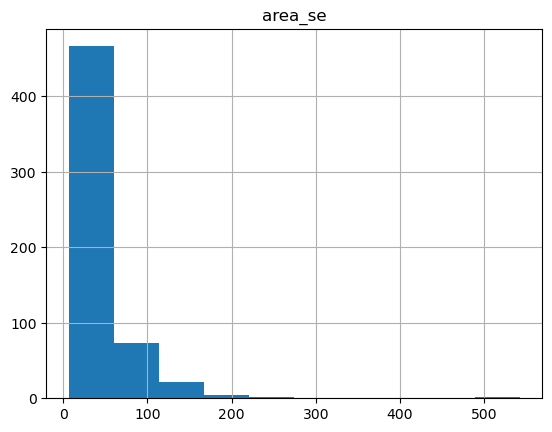

In [18]:
df.hist(column = 'area_se') 

array([[<Axes: title={'center': 'smoothness_se'}>]], dtype=object)

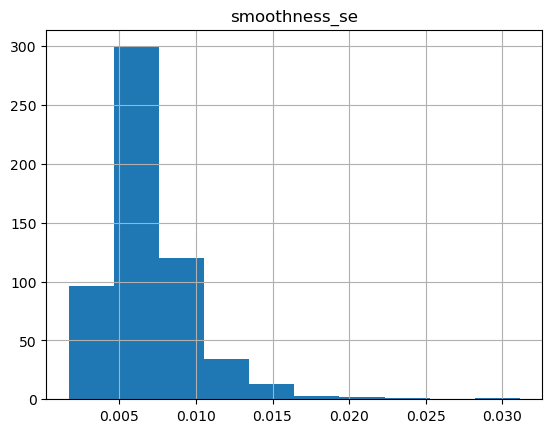

In [19]:
df.hist(column = 'smoothness_se')

array([[<Axes: title={'center': 'compactness_se'}>]], dtype=object)

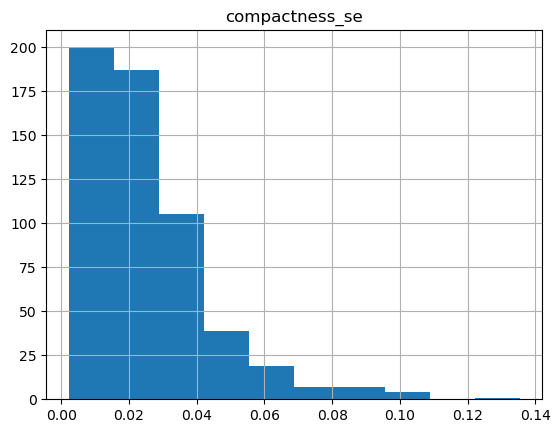

In [20]:
df.hist(column = 'compactness_se')

array([[<Axes: title={'center': 'concavity_se'}>]], dtype=object)

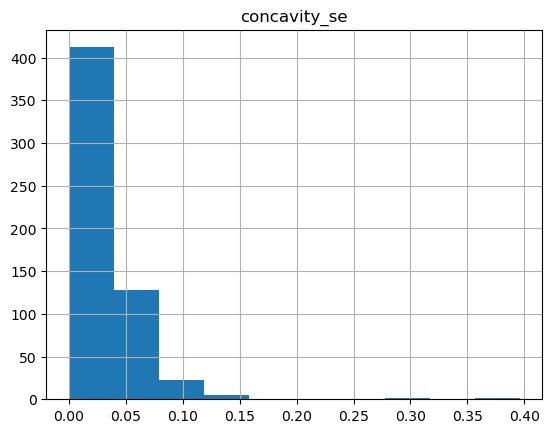

In [21]:
df.hist(column = 'concavity_se') 

array([[<Axes: title={'center': 'symmetry_se'}>]], dtype=object)

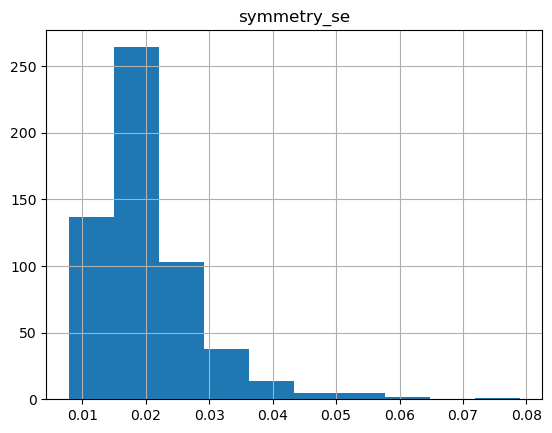

In [22]:
df.hist(column = 'symmetry_se')

array([[<Axes: title={'center': 'fractal_dimension_se'}>]], dtype=object)

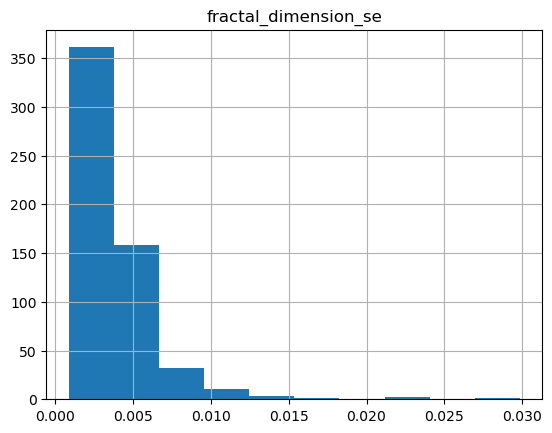

In [23]:
df.hist(column = 'fractal_dimension_se')

array([[<Axes: title={'center': 'texture_worst'}>]], dtype=object)

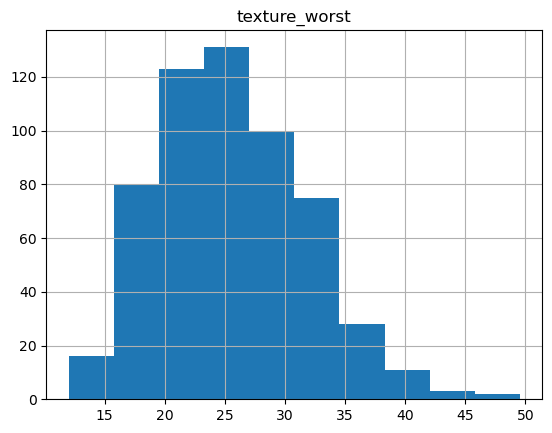

In [24]:
df.hist(column = 'texture_worst')

array([[<Axes: title={'center': 'smoothness_worst'}>]], dtype=object)

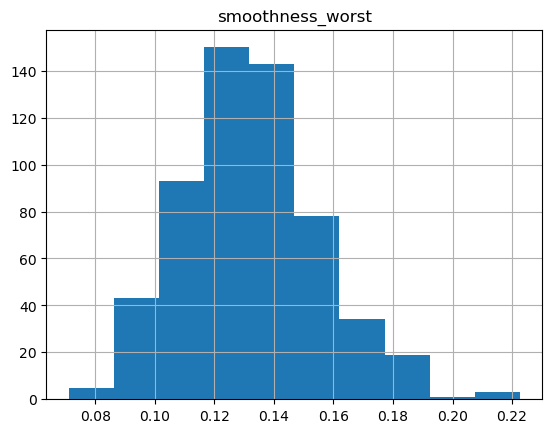

In [25]:
df.hist(column = 'smoothness_worst')

array([[<Axes: title={'center': 'compactness_worst'}>]], dtype=object)

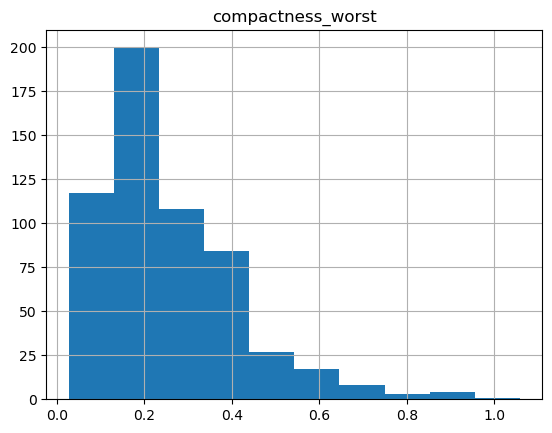

In [26]:
df.hist(column = 'compactness_worst')

array([[<Axes: title={'center': 'concavity_worst'}>]], dtype=object)

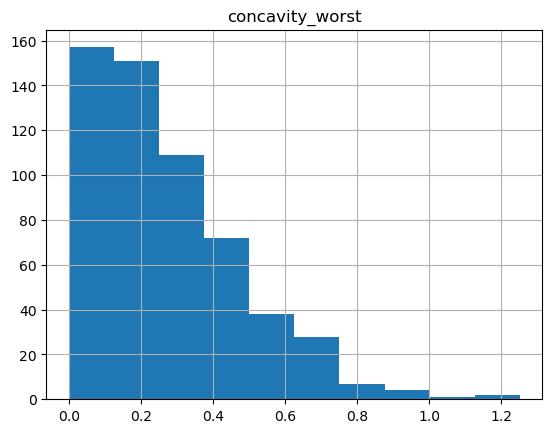

In [27]:
df.hist(column = 'concavity_worst')

array([[<Axes: title={'center': 'concave points_worst'}>]], dtype=object)

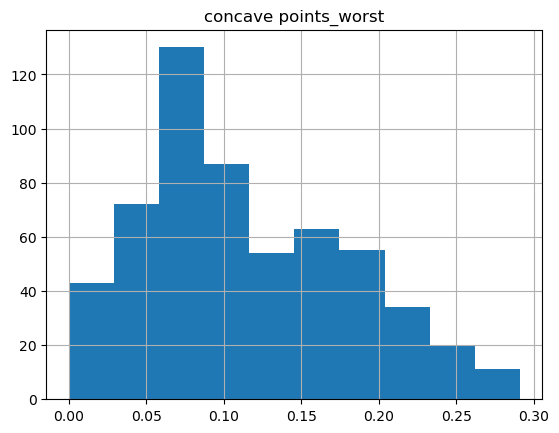

In [28]:
df.hist(column = 'concave points_worst')

array([[<Axes: title={'center': 'symmetry_worst'}>]], dtype=object)

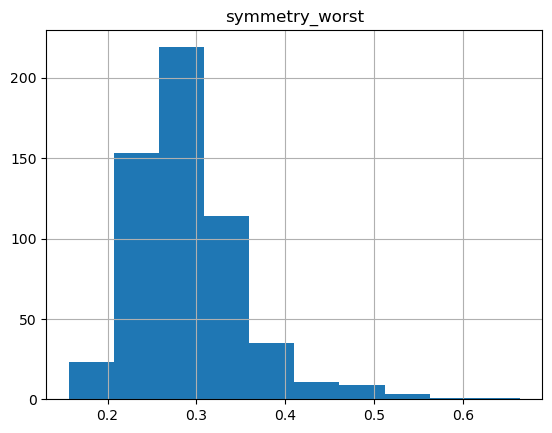

In [29]:
df.hist(column = 'symmetry_worst')

array([[<Axes: title={'center': 'fractal_dimension_worst'}>]],
      dtype=object)

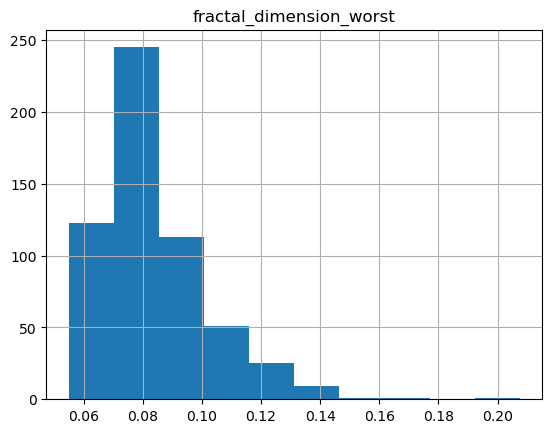

In [30]:
df.hist(column = 'fractal_dimension_worst')

# Fix Skewness

We fix the skewness values by normalizing the values, either using Square Root transformation or Logarthmic Transformation. This is done by applying .sqrt() or .log() to the the coloumns.

In [31]:
# Normalize Columns (Those More than or Less than 1 and -1 respectively)

# _mean
# compactness_mean
df['compactness_mean'] = np.sqrt(df['compactness_mean'])
# concavity_mean
df['concavity_mean'] = np.sqrt(df['concavity_mean'])
# fractal_dimension_mean
df['fractal_dimension_mean'] = np.log(df['fractal_dimension_mean'])

# _se
# radius_se
df['radius_se'] = np.log(df['radius_se'])
# texture_se
df['texture_se'] = np.sqrt(df['texture_se'])
# perimeter_se
df['perimeter_se'] = np.log(df['perimeter_se'])
# area_se
df['area_se'] = np.log(df['area_se'])
# smoothness_se
df['smoothness_se'] = np.log(df['smoothness_se'])
# concavity_se
df['concavity_se'] = np.sqrt(df['concavity_se'])
# compactness_se
df['compactness_se'] = np.log(df['compactness_se'])
# symmetry_se
df['symmetry_se'] = np.log(df['symmetry_se'])
# fractal_dimension_se
df['fractal_dimension_se'] = np.log(df['fractal_dimension_se'])


# _worst
# compactness_worst
df['compactness_worst'] = np.sqrt(df['compactness_worst'])
# symmetry_worst
df['symmetry_worst'] = np.sqrt(df['symmetry_worst'])
# concavity_worst
df['concavity_worst'] = np.sqrt(df['concavity_worst'])
# fractal_dimension_worst
df['fractal_dimension_worst'] = np.log(df['fractal_dimension_worst'])

df

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concavity_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,0.11840,0.526878,0.547814,0.2419,-2.541985,0.090754,0.951473,...,0.231797,-3.505558,-5.084336,17.33,0.16220,0.815843,0.843742,0.2654,0.678307,-2.129472
1,M,20.57,17.77,0.08474,0.280428,0.294788,0.1812,-2.870510,-0.609726,0.856680,...,0.136382,-4.276586,-5.645891,23.41,0.12380,0.431972,0.491528,0.1860,0.524404,-2.418894
2,M,19.69,21.25,0.10960,0.399875,0.444297,0.2069,-2.813577,-0.293566,0.887074,...,0.195755,-3.794240,-5.388023,25.53,0.14440,0.651537,0.671118,0.2430,0.601082,-2.435203
3,M,11.42,20.38,0.14250,0.532823,0.491325,0.2597,-2.328518,-0.701986,1.075174,...,0.237929,-2.819596,-4.687683,26.50,0.20980,0.930752,0.828794,0.2575,0.814739,-1.754464
4,M,20.29,14.34,0.10030,0.364417,0.444972,0.1809,-2.833103,-0.278128,0.883912,...,0.238495,-4.042132,-5.275578,16.67,0.13740,0.452769,0.632456,0.1625,0.486210,-2.566811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,0.11100,0.340441,0.493862,0.1726,-2.878305,0.162119,1.120714,...,0.227991,-4.497213,-5.463428,26.40,0.14100,0.459674,0.640859,0.2216,0.453872,-2.642965
565,M,20.13,28.25,0.09780,0.321559,0.379473,0.1752,-2.894440,-0.267226,1.569395,...,0.198746,-3.964369,-5.992265,38.25,0.11660,0.438406,0.567010,0.1628,0.507149,-2.712510
566,M,16.60,28.08,0.08455,0.319844,0.304155,0.1590,-2.873869,-0.784386,1.036822,...,0.217486,-4.329055,-5.548832,34.12,0.11390,0.556237,0.583352,0.1418,0.470956,-2.548486
567,M,20.60,29.33,0.11780,0.526308,0.592790,0.2397,-2.656977,-0.320205,1.262933,...,0.266777,-3.761880,-5.085628,39.42,0.16500,0.931719,0.968865,0.2650,0.639296,-2.087474


# Skewness After

Print out the skewness values after transforming the necessary columns. Check if they are below 1 or above -1

In [32]:
df.skew(axis = 0, skipna = True, numeric_only = True)

radius_mean                0.942380
texture_mean               0.650450
smoothness_mean            0.456324
compactness_mean           0.564793
concavity_mean             0.360016
symmetry_mean              0.725609
fractal_dimension_mean     0.853573
radius_se                  0.572974
texture_se                 0.741415
perimeter_se               0.637943
area_se                    0.797609
smoothness_se              0.404364
compactness_se            -0.004041
concavity_se               0.937892
symmetry_se                0.689416
fractal_dimension_se       0.530075
texture_worst              0.498321
smoothness_worst           0.415426
compactness_worst          0.604870
concavity_worst            0.027867
concave points_worst       0.492616
symmetry_worst             0.890223
fractal_dimension_worst    0.799345
dtype: float64

# Updated Histograms

Showcase the updated histograms visualization; this can be used for understanding purposes as to show how a less skewed version of the data should look like.

array([[<Axes: title={'center': 'radius_mean'}>]], dtype=object)

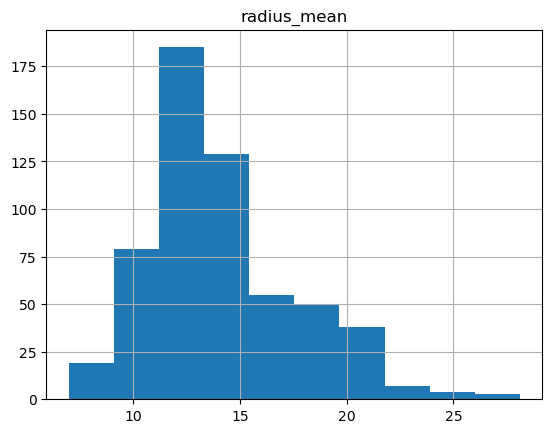

In [33]:
df.hist(column = 'radius_mean')

array([[<Axes: title={'center': 'texture_mean'}>]], dtype=object)

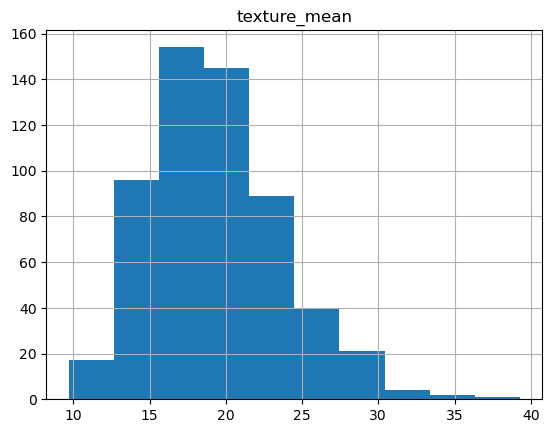

In [34]:
df.hist(column = 'texture_mean')

array([[<Axes: title={'center': 'smoothness_mean'}>]], dtype=object)

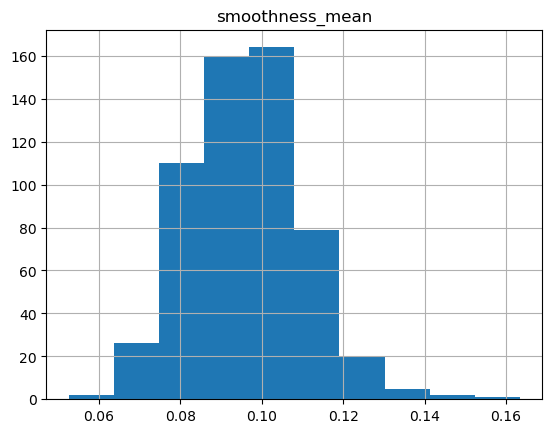

In [35]:
df.hist(column = 'smoothness_mean')

array([[<Axes: title={'center': 'compactness_mean'}>]], dtype=object)

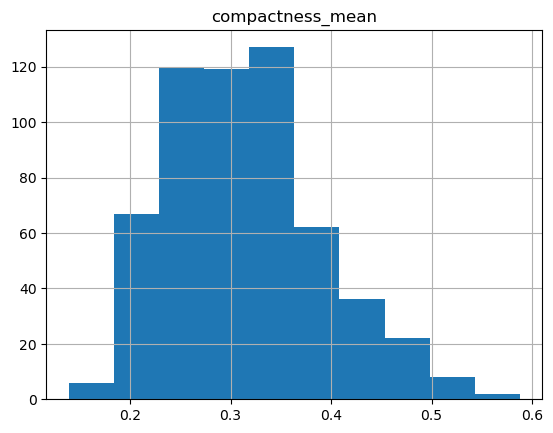

In [36]:
df.hist(column = 'compactness_mean')

array([[<Axes: title={'center': 'concavity_mean'}>]], dtype=object)

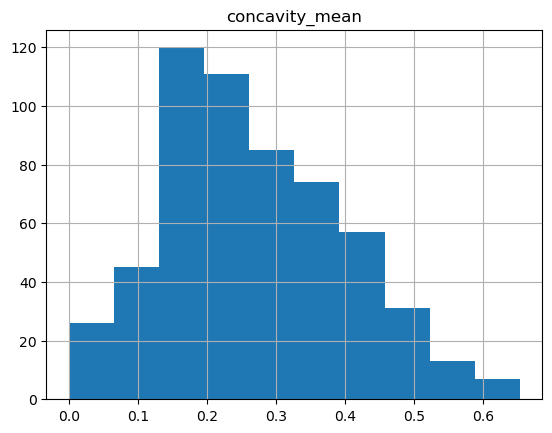

In [37]:
df.hist(column = 'concavity_mean')

array([[<Axes: title={'center': 'symmetry_mean'}>]], dtype=object)

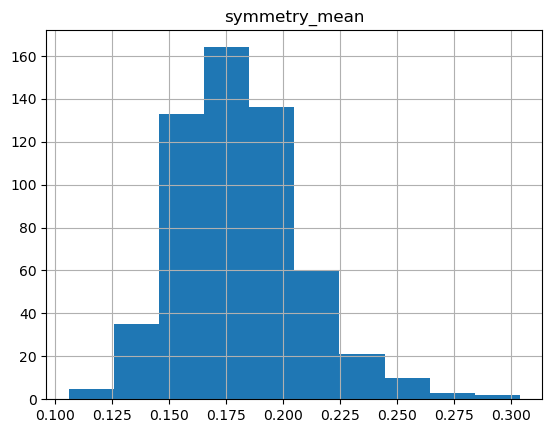

In [38]:
df.hist(column = 'symmetry_mean')

array([[<Axes: title={'center': 'fractal_dimension_mean'}>]], dtype=object)

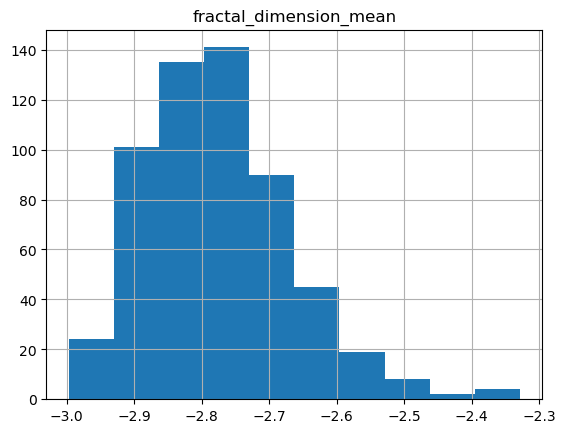

In [39]:
df.hist(column = 'fractal_dimension_mean')

array([[<Axes: title={'center': 'radius_se'}>]], dtype=object)

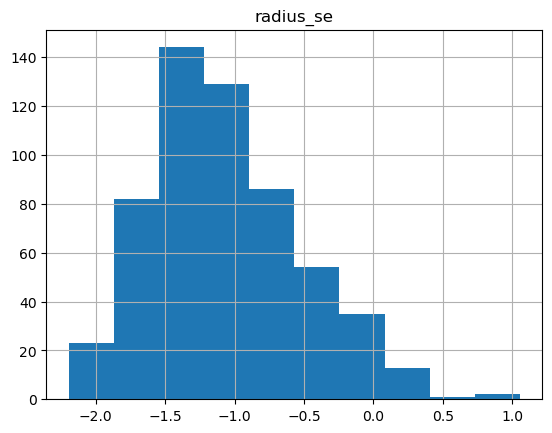

In [40]:
df.hist(column = 'radius_se')

array([[<Axes: title={'center': 'texture_se'}>]], dtype=object)

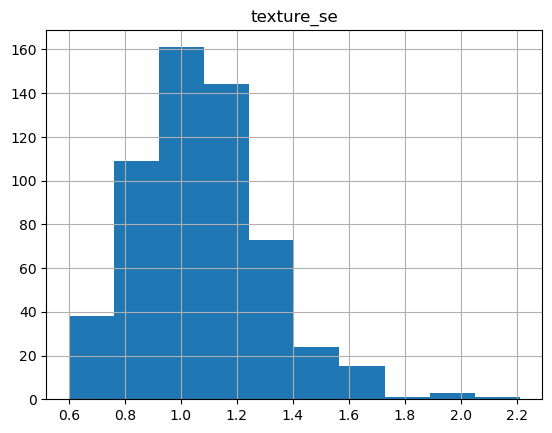

In [41]:
df.hist(column = 'texture_se')

array([[<Axes: title={'center': 'perimeter_se'}>]], dtype=object)

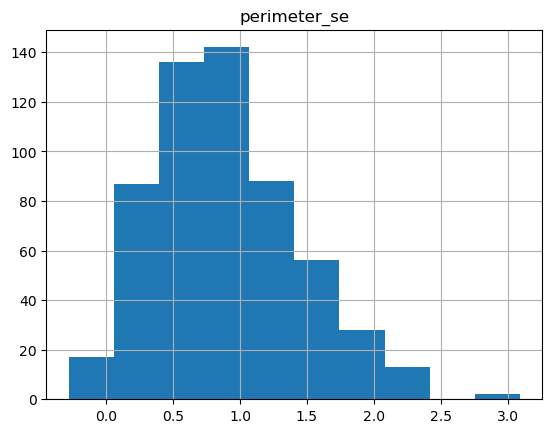

In [42]:
df.hist(column = 'perimeter_se')

array([[<Axes: title={'center': 'area_se'}>]], dtype=object)

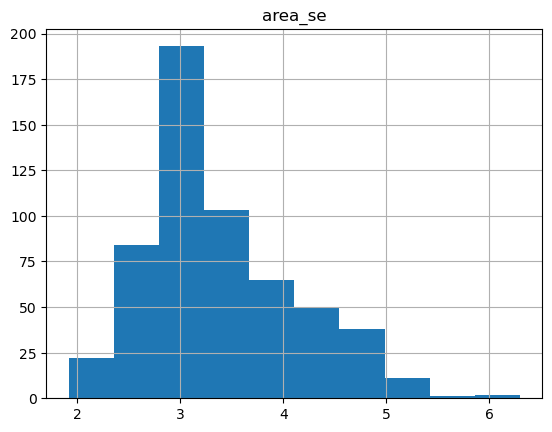

In [43]:
df.hist(column = 'area_se')

array([[<Axes: title={'center': 'smoothness_se'}>]], dtype=object)

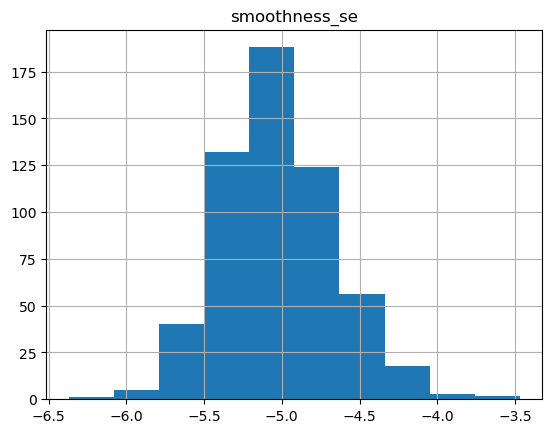

In [44]:
df.hist(column = 'smoothness_se')

array([[<Axes: title={'center': 'compactness_se'}>]], dtype=object)

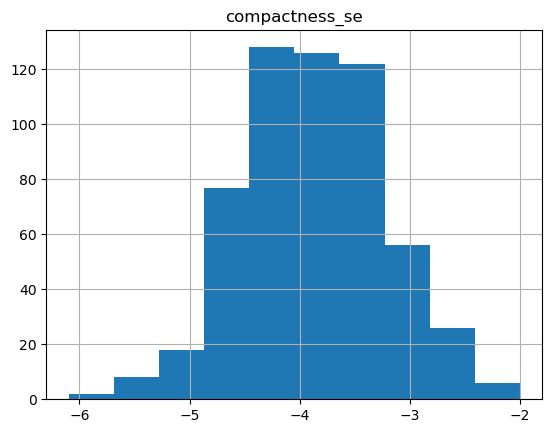

In [45]:
df.hist(column = 'compactness_se')

array([[<Axes: title={'center': 'concavity_se'}>]], dtype=object)

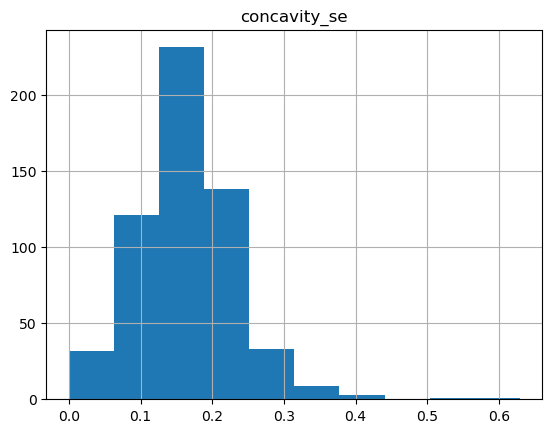

In [46]:
df.hist(column = 'concavity_se')

array([[<Axes: title={'center': 'symmetry_se'}>]], dtype=object)

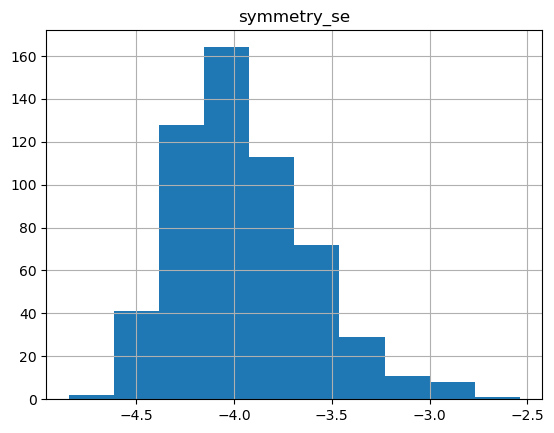

In [47]:
df.hist(column = 'symmetry_se')

array([[<Axes: title={'center': 'fractal_dimension_se'}>]], dtype=object)

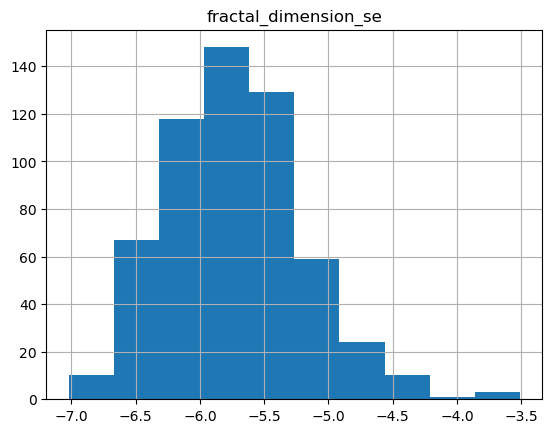

In [48]:
df.hist(column = 'fractal_dimension_se')

array([[<Axes: title={'center': 'texture_worst'}>]], dtype=object)

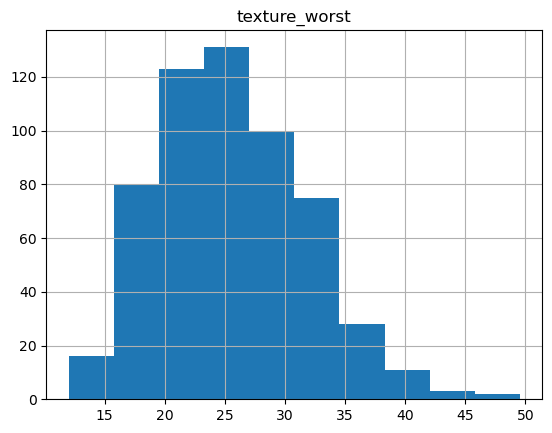

In [49]:
df.hist(column = 'texture_worst')

array([[<Axes: title={'center': 'smoothness_worst'}>]], dtype=object)

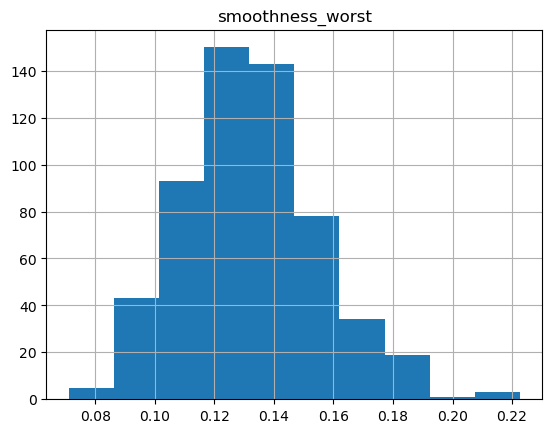

In [50]:
df.hist(column = 'smoothness_worst')

array([[<Axes: title={'center': 'compactness_worst'}>]], dtype=object)

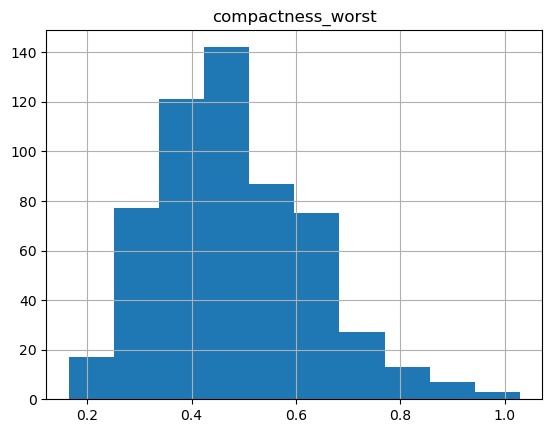

In [51]:
df.hist(column = 'compactness_worst')

array([[<Axes: title={'center': 'concavity_worst'}>]], dtype=object)

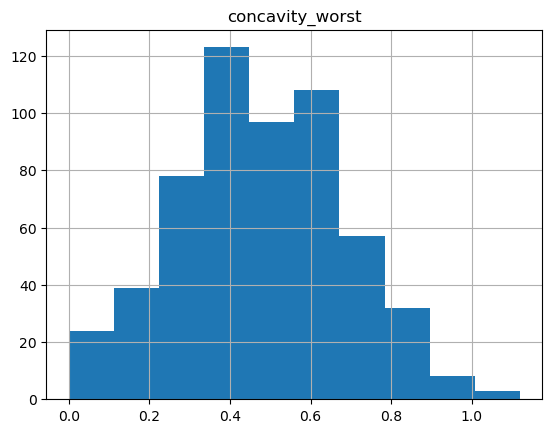

In [52]:
df.hist(column = 'concavity_worst')

array([[<Axes: title={'center': 'concave points_worst'}>]], dtype=object)

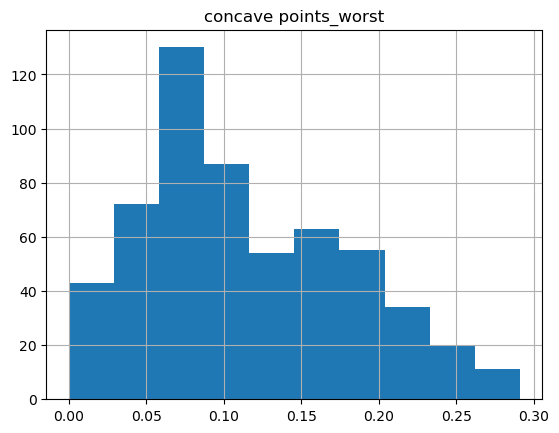

In [53]:
df.hist(column = 'concave points_worst')

array([[<Axes: title={'center': 'symmetry_worst'}>]], dtype=object)

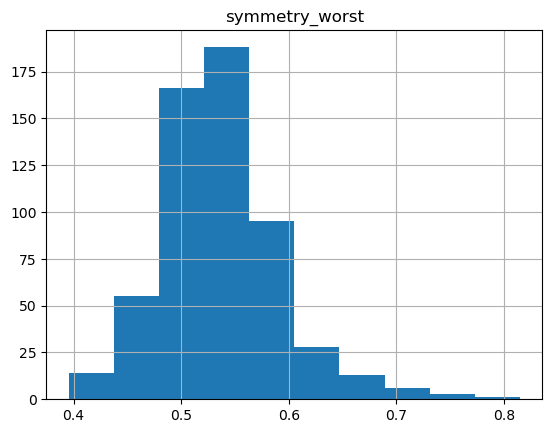

In [54]:
df.hist(column = 'symmetry_worst')

array([[<Axes: title={'center': 'fractal_dimension_worst'}>]],
      dtype=object)

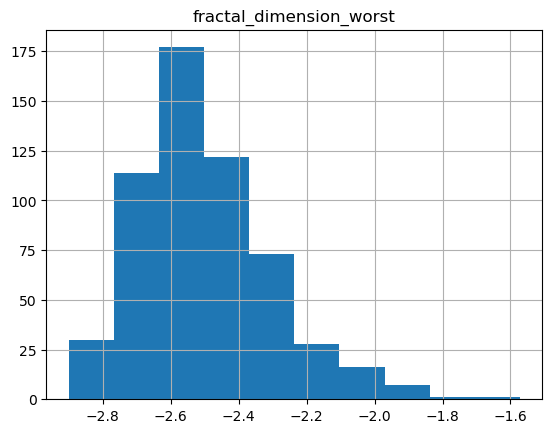

In [55]:
df.hist(column = 'fractal_dimension_worst')

# New Heatmap

Also showcase the new heatmap, you can compare it the old one above to see the differences. Same as above, the value on the right only goes to -0.3 as that is the largest negative number on the heatmap. Going all the way to -1 would make it harder to read and understand the visualization

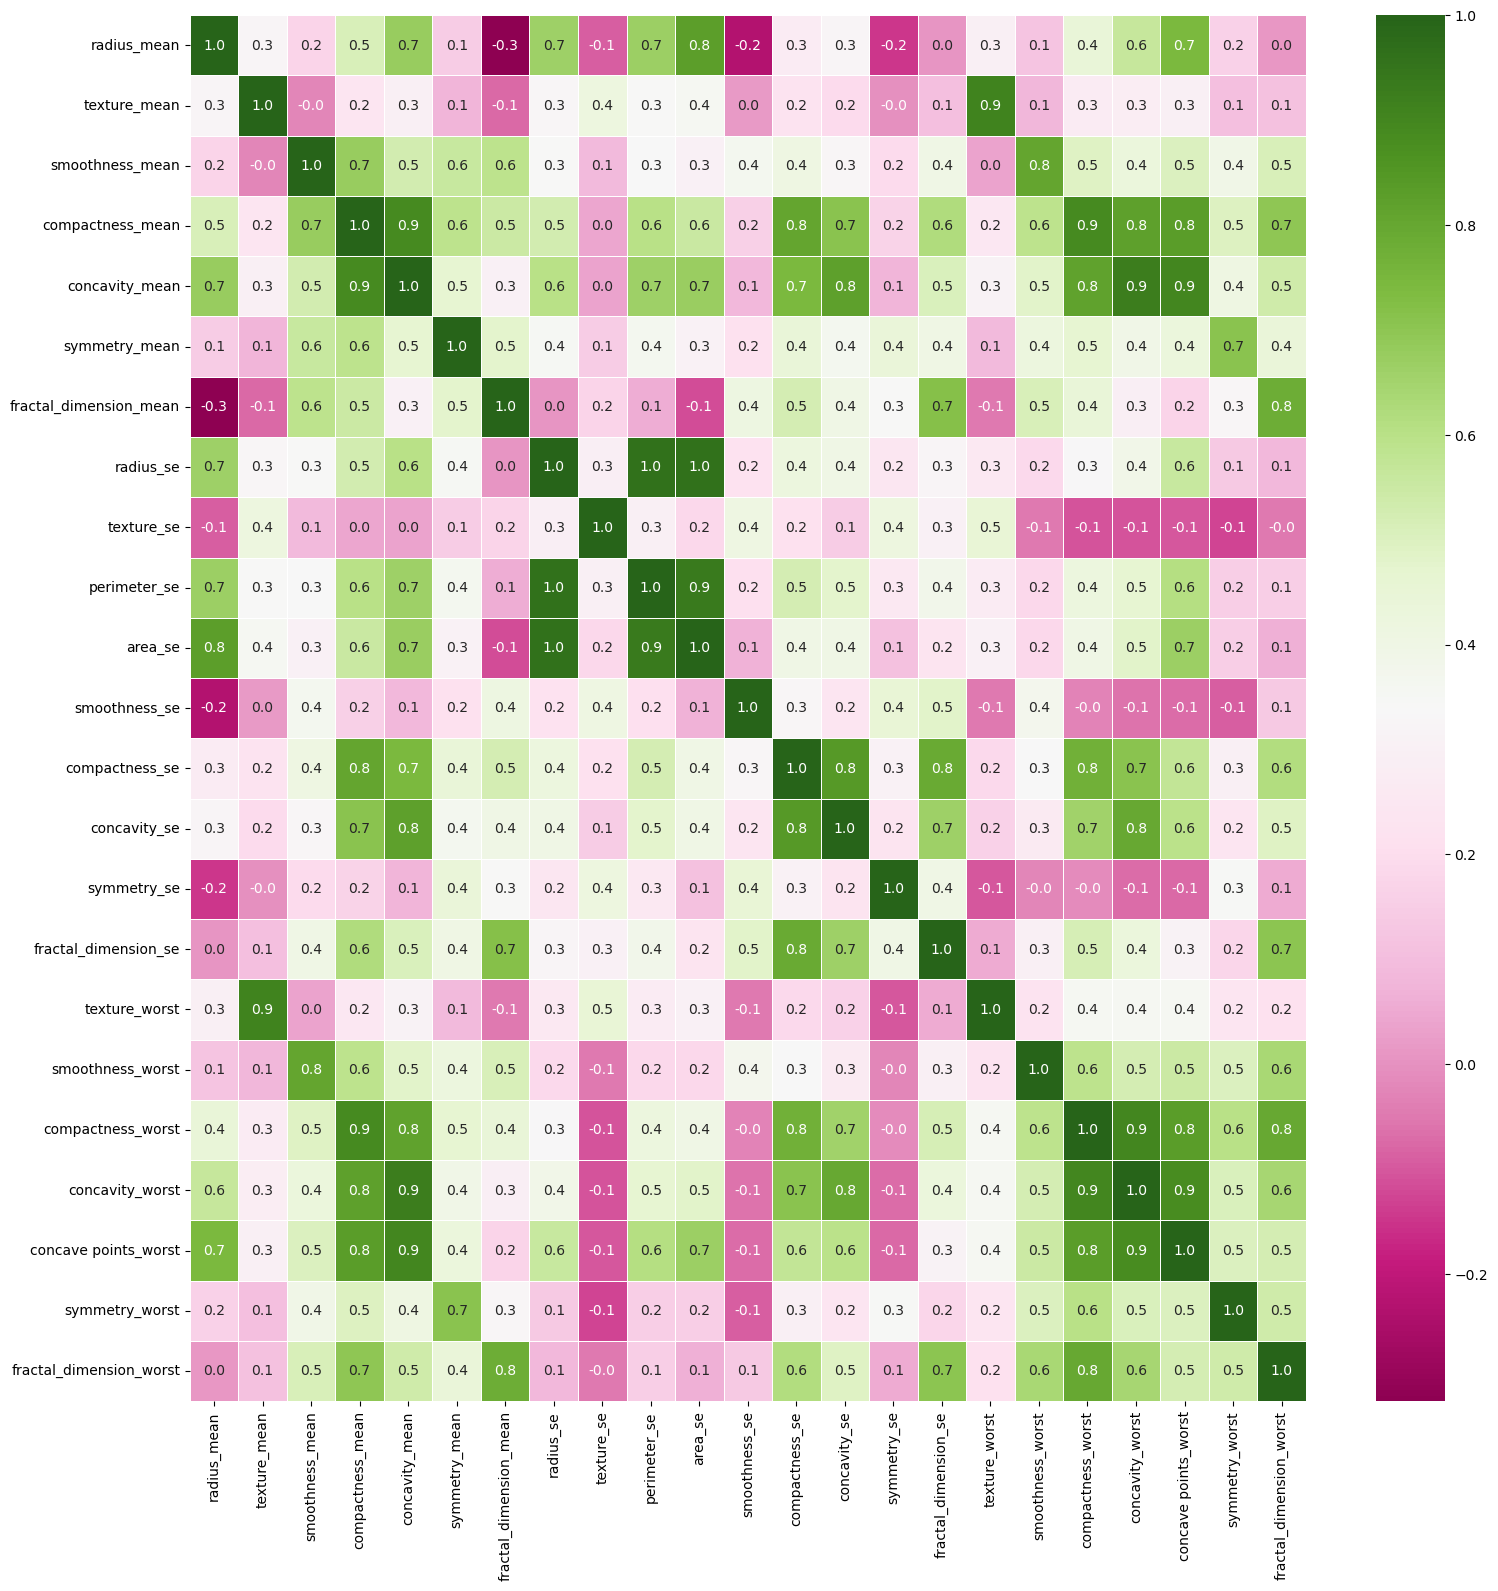

In [56]:
heatmap_df_2 = df.select_dtypes(include = np.number)
corr_2 = heatmap_df_2.corr()
f,ax = plt.subplots(figsize = (18, 18))
ax2 = sns.heatmap(corr_2, annot = True, linewidths = .5, fmt = '.1f', ax = ax, cmap = "PiYG")
plt.show()

# Boxplot

Ask BIL why was a boxplot needed; ask if can remove

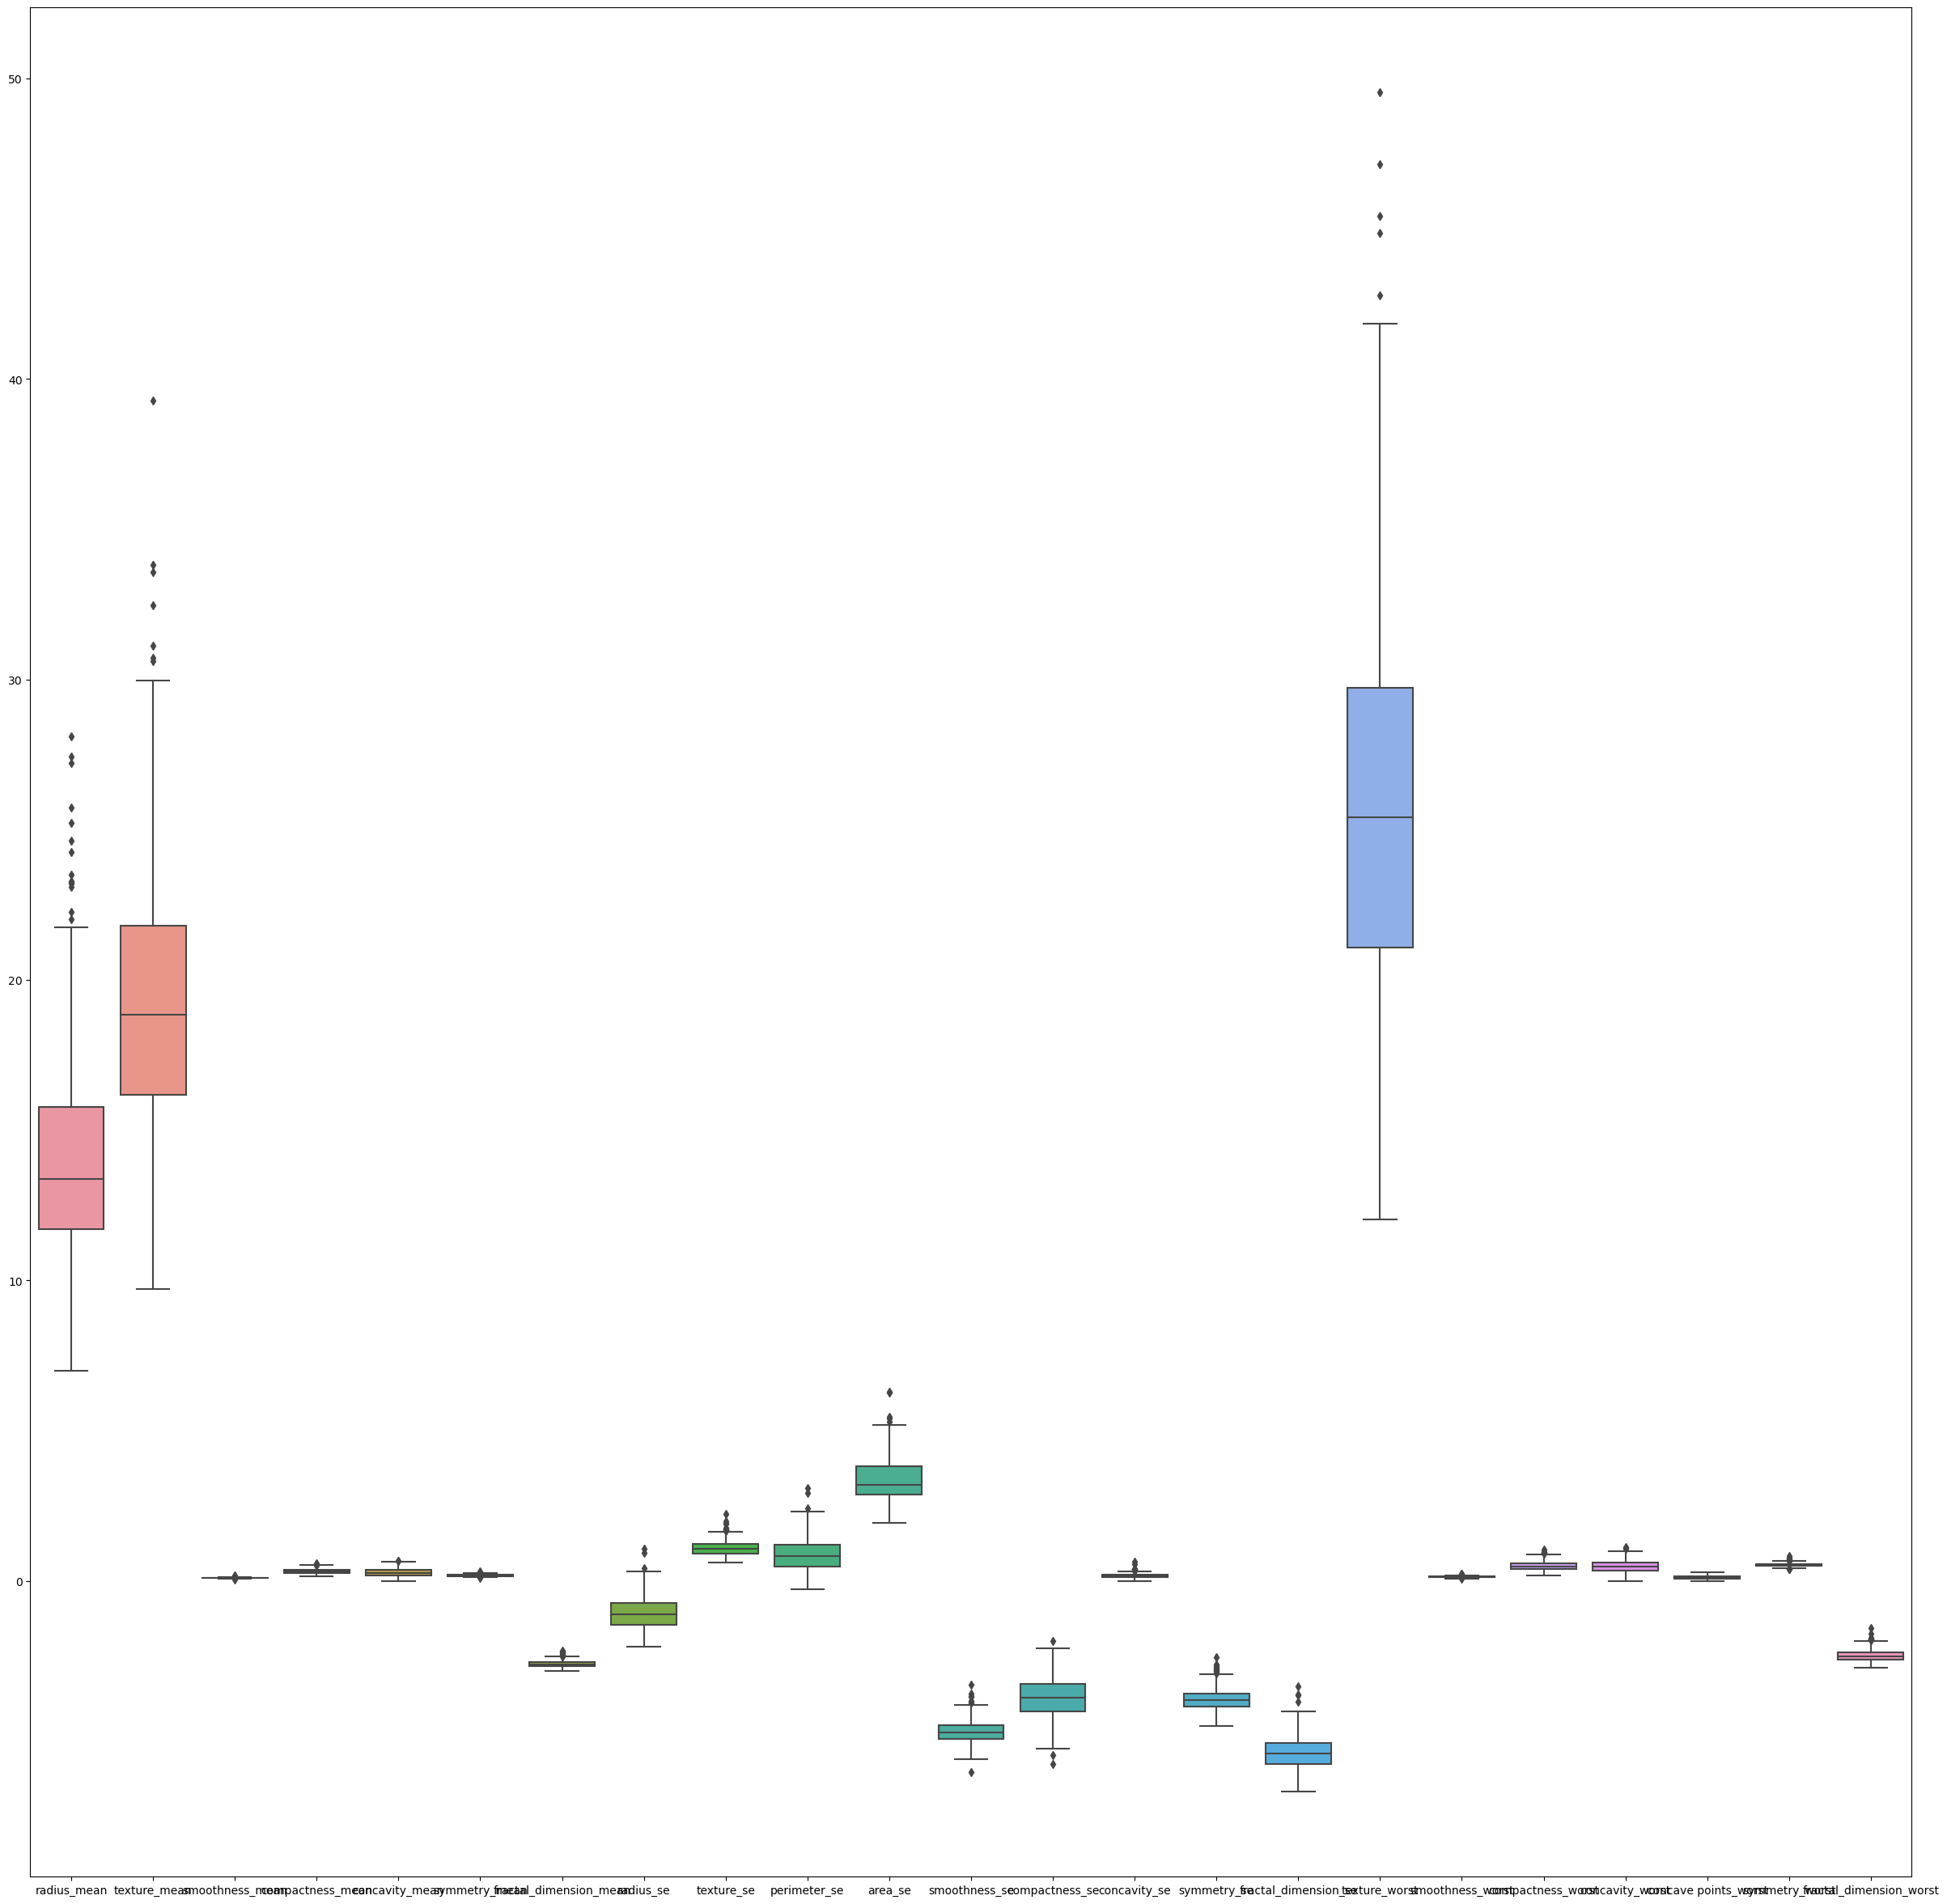

In [57]:
plt.figure(figsize = (30, 30))
sns.boxplot(data = heatmap_df_2)
plt.show()

## Train/Test Data Split - Using 5-Fold Cross Validation

Using K-Fold Cross Validation to split data

In [58]:
df_2 = df
df_2

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concavity_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,0.11840,0.526878,0.547814,0.2419,-2.541985,0.090754,0.951473,...,0.231797,-3.505558,-5.084336,17.33,0.16220,0.815843,0.843742,0.2654,0.678307,-2.129472
1,M,20.57,17.77,0.08474,0.280428,0.294788,0.1812,-2.870510,-0.609726,0.856680,...,0.136382,-4.276586,-5.645891,23.41,0.12380,0.431972,0.491528,0.1860,0.524404,-2.418894
2,M,19.69,21.25,0.10960,0.399875,0.444297,0.2069,-2.813577,-0.293566,0.887074,...,0.195755,-3.794240,-5.388023,25.53,0.14440,0.651537,0.671118,0.2430,0.601082,-2.435203
3,M,11.42,20.38,0.14250,0.532823,0.491325,0.2597,-2.328518,-0.701986,1.075174,...,0.237929,-2.819596,-4.687683,26.50,0.20980,0.930752,0.828794,0.2575,0.814739,-1.754464
4,M,20.29,14.34,0.10030,0.364417,0.444972,0.1809,-2.833103,-0.278128,0.883912,...,0.238495,-4.042132,-5.275578,16.67,0.13740,0.452769,0.632456,0.1625,0.486210,-2.566811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,0.11100,0.340441,0.493862,0.1726,-2.878305,0.162119,1.120714,...,0.227991,-4.497213,-5.463428,26.40,0.14100,0.459674,0.640859,0.2216,0.453872,-2.642965
565,M,20.13,28.25,0.09780,0.321559,0.379473,0.1752,-2.894440,-0.267226,1.569395,...,0.198746,-3.964369,-5.992265,38.25,0.11660,0.438406,0.567010,0.1628,0.507149,-2.712510
566,M,16.60,28.08,0.08455,0.319844,0.304155,0.1590,-2.873869,-0.784386,1.036822,...,0.217486,-4.329055,-5.548832,34.12,0.11390,0.556237,0.583352,0.1418,0.470956,-2.548486
567,M,20.60,29.33,0.11780,0.526308,0.592790,0.2397,-2.656977,-0.320205,1.262933,...,0.266777,-3.761880,-5.085628,39.42,0.16500,0.931719,0.968865,0.2650,0.639296,-2.087474


# Convert to Boolean

Convert 'diagnosis' which is initially an 'object' as can be see below to a Boolean.

Map 'B' to True and 'M' to False

In [59]:
result = df_2.dtypes

print("Output:")
print(result)

Output:
diagnosis                   object
radius_mean                float64
texture_mean               float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
symmetry_se                float64
fractal_dimension_se       float64
texture_worst              float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst             float64
fractal_dimension_worst    float64
dtype: object


### Conversion

In [60]:
import ast

df_2['diagnosis'] = df_2['diagnosis'].map({'B':True, 'M':False})
df_2

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concavity_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,False,17.99,10.38,0.11840,0.526878,0.547814,0.2419,-2.541985,0.090754,0.951473,...,0.231797,-3.505558,-5.084336,17.33,0.16220,0.815843,0.843742,0.2654,0.678307,-2.129472
1,False,20.57,17.77,0.08474,0.280428,0.294788,0.1812,-2.870510,-0.609726,0.856680,...,0.136382,-4.276586,-5.645891,23.41,0.12380,0.431972,0.491528,0.1860,0.524404,-2.418894
2,False,19.69,21.25,0.10960,0.399875,0.444297,0.2069,-2.813577,-0.293566,0.887074,...,0.195755,-3.794240,-5.388023,25.53,0.14440,0.651537,0.671118,0.2430,0.601082,-2.435203
3,False,11.42,20.38,0.14250,0.532823,0.491325,0.2597,-2.328518,-0.701986,1.075174,...,0.237929,-2.819596,-4.687683,26.50,0.20980,0.930752,0.828794,0.2575,0.814739,-1.754464
4,False,20.29,14.34,0.10030,0.364417,0.444972,0.1809,-2.833103,-0.278128,0.883912,...,0.238495,-4.042132,-5.275578,16.67,0.13740,0.452769,0.632456,0.1625,0.486210,-2.566811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,21.56,22.39,0.11100,0.340441,0.493862,0.1726,-2.878305,0.162119,1.120714,...,0.227991,-4.497213,-5.463428,26.40,0.14100,0.459674,0.640859,0.2216,0.453872,-2.642965
565,False,20.13,28.25,0.09780,0.321559,0.379473,0.1752,-2.894440,-0.267226,1.569395,...,0.198746,-3.964369,-5.992265,38.25,0.11660,0.438406,0.567010,0.1628,0.507149,-2.712510
566,False,16.60,28.08,0.08455,0.319844,0.304155,0.1590,-2.873869,-0.784386,1.036822,...,0.217486,-4.329055,-5.548832,34.12,0.11390,0.556237,0.583352,0.1418,0.470956,-2.548486
567,False,20.60,29.33,0.11780,0.526308,0.592790,0.2397,-2.656977,-0.320205,1.262933,...,0.266777,-3.761880,-5.085628,39.42,0.16500,0.931719,0.968865,0.2650,0.639296,-2.087474


As you can see below, object has changed to bool for 'diagnosis' column

In [61]:
result = df_2.dtypes

print("Output:")
print(result)

Output:
diagnosis                     bool
radius_mean                float64
texture_mean               float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
symmetry_se                float64
fractal_dimension_se       float64
texture_worst              float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst             float64
fractal_dimension_worst    float64
dtype: object


###  Further Conversion

Lets further convert it from Boolean to Integer, so that it can be used in the algorithms moving forward. This is easily done using .astype() as seen in the code below

In [62]:
df_2["diagnosis"] = df_2["diagnosis"].astype(int)

result = df_2.dtypes
print("Output:")
print(result)

Output:
diagnosis                    int32
radius_mean                float64
texture_mean               float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
symmetry_se                float64
fractal_dimension_se       float64
texture_worst              float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst             float64
fractal_dimension_worst    float64
dtype: object


# Running Algorithm with K-Fold Cross Validation

In each of the algorithms below, we run a K-Fold Cross Validation to split up the data and then use sed data to gain an accuracy score. K value varies so as to produce the best possible accuracy level. Perceptron and Support Vector Machines use 7-Fold where Logistic Regression and Random Forest use 5-Fold.

### Perceptron

Accuracy + Confusion Matrix

Avg accuracy: 0.9298834258183851
[[191  21]
 [ 19 338]]


<Axes: >

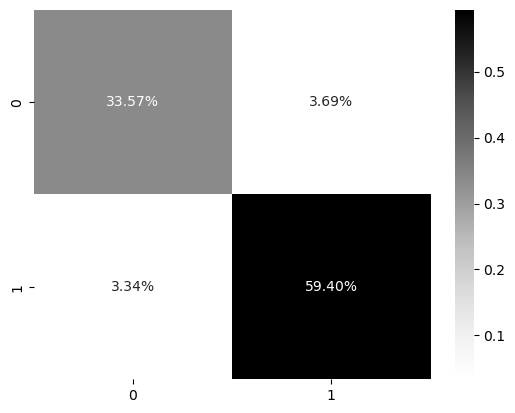

In [63]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

X = df_2.iloc[:,1:]
y = df_2.iloc[:,-24]

k = 7
kf = KFold(n_splits = k, random_state = None)
model = Perceptron()

result = cross_val_score(model , X, y, cv = kf)
y_train_pred = cross_val_predict(model, X, y, cv = kf)
cf_matrix = confusion_matrix(y, y_train_pred)
 
print("Avg accuracy: {}".format(result.mean()))
print(cf_matrix)

labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, fmt = '.2%', cmap = 'Greys')

From the above, we can use the values acquired from the confusion matrix to calculate the F1 Score, Recall and Precision as well.

In [64]:
# True Positive
TP = 191
# True Negative
TN = 338
# False Negative
FP = 21
# False Positive
FN = 19

# Precision
precision = TP / (TP + FP)
print ("Precision = {0}".format(precision))

# Recall
recall = TP / (TP + FN)
print ("Recall = {0}".format(recall))

# F-1 Score
f1_score = 2 / ((1/recall) + (1/precision))
print ("F1-Score = {0}".format(f1_score))

Precision = 0.9009433962264151
Recall = 0.9095238095238095
F1-Score = 0.9052132701421802


### Logistic Regression

Accuracy + Confusion Matrix

Avg accuracy: 0.952585002328831
[[195  17]
 [ 10 347]]


<Axes: >

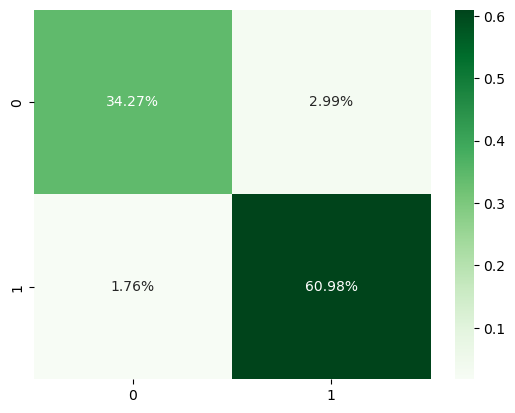

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

X = df_2.iloc[:,1:]
y = df_2.iloc[:,-24]
 
k = 5
kf = KFold(n_splits = k, random_state = None)
model = LogisticRegression(solver = 'liblinear')
 
result = cross_val_score(model , X, y, cv = kf)
y_train_pred = cross_val_predict(model, X, y, cv = kf)
cf_matrix = confusion_matrix(y, y_train_pred)

print("Avg accuracy: {}".format(result.mean()))
print(cf_matrix)

labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, fmt = '.2%', cmap = 'Greens')

From the above, we can use the values acquired from the confusion matrix to calculate the F1 Score, Recall and Precision as well.

In [66]:
# True Positive
TP = 195
# True Negative
TN = 347
# False Negative
FP = 17
# False Positive
FN = 10

# Precision
precision = TP / (TP + FP)
print ("Precision = {0}".format(precision))

# Recall
recall = TP / (TP + FN)
print ("Recall = {0}".format(recall))

# F-1 Score
f1_score = 2 / ((1/recall) + (1/precision))
print ("F1-Score = {0}".format(f1_score))

Precision = 0.9198113207547169
Recall = 0.9512195121951219
F1-Score = 0.9352517985611509


### Random Forest

Accuracy + Confusion Matrix

Avg accuracy: 0.9613569321533924
[[198  14]
 [  7 350]]


<Axes: >

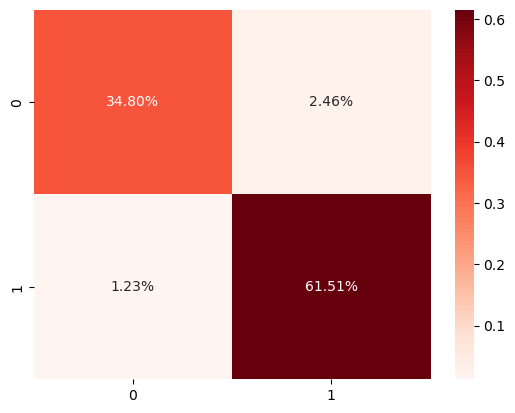

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

X = df_2.iloc[:,1:]
y = df_2.iloc[:,-24]

k = 5
kf = KFold(n_splits = k, random_state = None)
model = RandomForestClassifier()
 
result = cross_val_score(model , X, y, cv = kf)
y_train_pred = cross_val_predict(model, X, y, cv = kf)
cf_matrix = confusion_matrix(y, y_train_pred)
 
print("Avg accuracy: {}".format(result.mean()))
print(cf_matrix)

labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, fmt = '.2%', cmap = 'Reds')

From the above, we can use the values acquired from the confusion matrix to calculate the F1 Score, Recall and Precision as well.

In [71]:
# True Positive
TP = 198
# True Negative
TN = 350
# False Negative
FP = 14
# False Positive
FN = 7

# Precision
precision = TP / (TP + FP)
print ("Precision = {0}".format(precision))

# Recall
recall = TP / (TP + FN)
print ("Recall = {0}".format(recall))

# F-1 Score
f1_score = 2 / ((1/recall) + (1/precision))
print ("F1-Score = {0}".format(f1_score))

Precision = 0.9339622641509434
Recall = 0.9658536585365853
F1-Score = 0.949640287769784


### Support Vector Machines (SVM)

Accuracy + Confusion Matrix

Avg accuracy: 0.9702112100486084
[[202  10]
 [  7 350]]


<Axes: >

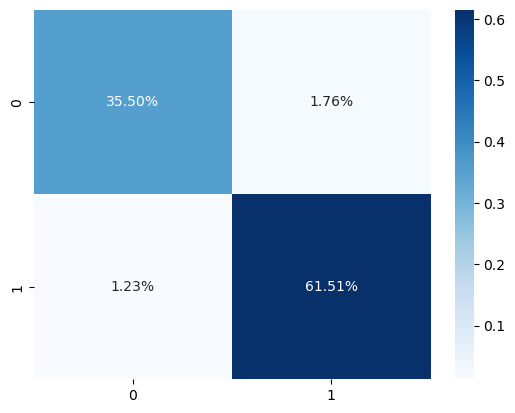

In [69]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

X = df_2.iloc[:,1:]
y = df_2.iloc[:,-24]

k = 7
kf = KFold(n_splits = k, random_state = None)
model = svm.SVC(kernel = 'linear')

result = cross_val_score(model, X, y, cv = kf)

y_train_pred = cross_val_predict(model, X, y, cv = kf)
cf_matrix = confusion_matrix(y, y_train_pred)

print("Avg accuracy: {}".format(result.mean()))
print(cf_matrix)

labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, fmt = '.2%', cmap = 'Blues')

From the above, we can use the values acquired from the confusion matrix to calculate the F1 Score, Recall and Precision as well.

In [70]:
# True Positive
TP = 202
# True Negative
TN = 350
# False Negative
FP = 10
# False Positive
FN = 7

# Precision
precision = TP / (TP + FP)
print ("Precision = {0}".format(precision))

# Recall
recall = TP / (TP + FN)
print ("Recall = {0}".format(recall))

# F-1 Score
f1_score = 2 / ((1/recall) + (1/precision))
print ("F1-Score = {0}".format(f1_score))

Precision = 0.9528301886792453
Recall = 0.9665071770334929
F1-Score = 0.9596199524940617
